In [229]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

# Functions that will be used

In [32]:
def load_dataset(file_name):
    df = pd.read_csv(file_name)
    df=df.drop(columns=["Unnamed: 0"])
    return df

In [33]:
def split_df_to_x_y(df,target_column):
    y=df[target_column]
    features = [col for col in df.columns]
    features.remove(target_column)
    X=df[features]
    return X,y

In [34]:
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_ratio,random_state=rand_state)
    return X_train, X_test, y_train, y_test
    
    

In [35]:
def scale_features(X_train, scale_type):
    
    if scale_type == 'minmax' :
        
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_train)
        return scaler,X_train_scaled

    
    else:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_train)
        return scaler,X_train_scaled


In [36]:
def scale_test_features(X_test, scaler):
    return scaler.transform(X_test)

In [37]:
def train_model(X_train, y_train):
    trained_model= LogisticRegression().fit(X_train,y_train)
    return trained_model

In [38]:
#def predict(trained_model, X_test):
 #   predicted_vals = train_model.predict(X_test)
  #  return predicted_vals

In [39]:
def predict(classifier, X_test, y_test):
    y_pred=classifier.predict(X_test)
    resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    temp = pd.DataFrame({"Predicted":y_pred})
    return resDF,temp

In [40]:
def evaluate_performance(y_test,y_predicted):
    evaluate_value = f1_score(y_test,y_predicted)
    return evaluate_value


# Logistic Regression -Flow: 
## Question? will there be Fatalities? Yes/No

In [41]:
df= load_dataset('df_to_model.csv')

In [42]:
df.head(35)

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
5,143,17004,2,4,317,0,1,0,0,1,0,0,4,9,12,2019
6,136,22246,1,0,143,1,1,0,0,0,0,0,2,7,12,2019
7,76,19277,0,1,379,3,1,0,0,1,0,0,4,28,12,2019
8,76,17330,0,0,22,3,1,0,0,1,0,0,2,27,12,2019
9,0,10631,1,1,379,2,1,0,0,0,0,0,1,26,12,2019


In [43]:
#new_fatalities=pd.cut(df.FATALITIES,bins=[-1,0,1,20,50,100,2000],labels=[0,1,2,3,4,5])
new_fatalities=pd.cut(df.FATALITIES,bins=[-1,0,2000],labels=[0,1])

In [44]:
df["FATALITIES"]=new_fatalities

In [45]:
df.FATALITIES.describe()

count     114056
unique         2
top            0
freq       57121
Name: FATALITIES, dtype: int64

In [46]:
df.head(35)

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,1,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
5,143,17004,1,4,317,0,1,0,0,1,0,0,4,9,12,2019
6,136,22246,1,0,143,1,1,0,0,0,0,0,2,7,12,2019
7,76,19277,0,1,379,3,1,0,0,1,0,0,4,28,12,2019
8,76,17330,0,0,22,3,1,0,0,1,0,0,2,27,12,2019
9,0,10631,1,1,379,2,1,0,0,0,0,0,1,26,12,2019


### standard

In [47]:
target_column='FATALITIES'

X,y= split_df_to_x_y(df,target_column)

test_ratio, rand_state =0.3,11
X_train, X_test, y_train, y_test =split_to_train_and_test(X,y,test_ratio,rand_state)

scale_type= 'standard'
standard_scaler, X_train_standard_scaled = scale_features(X_train, scale_type)

X_test_standard_scaled = scale_test_features(X_test, standard_scaler)

classification_standard_model=train_model(X_train_standard_scaled, y_train)

df_standard_res,y_predicted = predict(classification_standard_model, X_test_standard_scaled, y_test)

evaluate = evaluate_performance(y_test,y_predicted)

In [48]:
df_standard_res

,Actual,Predicted
16940,0,0
48817,0,0
102424,0,0
38280,0,1
29268,0,0
...,...,...
95853,0,0
22579,1,1
1430,0,1
18463,0,0


In [49]:
evaluate

0.7753419852683269

### minmax

In [50]:
target_column='FATALITIES'
X,y= split_df_to_x_y(df,target_column)

test_ratio, rand_state =0.3,11
X_train, X_test, y_train, y_test =split_to_train_and_test(X,y,test_ratio,rand_state)

scale_type= 'minmax'
minmax_scaler, X_train_minmax_scaled = scale_features(X_train, scale_type)

X_test_minmax_scaled = scale_test_features(X_test, minmax_scaler)

classification_minmax_model = train_model(X_train_minmax_scaled, y_train)

df_minmax_res,y_predicted = predict(classification_minmax_model, X_test_minmax_scaled, y_test)

evaluate = evaluate_performance(y_test,y_predicted)

In [51]:
df_minmax_res

,Actual,Predicted
16940,0,0
48817,0,0
102424,0,0
38280,0,1
29268,0,0
...,...,...
95853,0,0
22579,1,1
1430,0,1
18463,0,0


In [52]:
evaluate

0.7491250635637582

# Logistic Regression -Flow:
## Question? will there be Injured? Yes/No

In [53]:
df= load_dataset('df_to_model.csv')

In [54]:
df.head(35)

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
5,143,17004,2,4,317,0,1,0,0,1,0,0,4,9,12,2019
6,136,22246,1,0,143,1,1,0,0,0,0,0,2,7,12,2019
7,76,19277,0,1,379,3,1,0,0,1,0,0,4,28,12,2019
8,76,17330,0,0,22,3,1,0,0,1,0,0,2,27,12,2019
9,0,10631,1,1,379,2,1,0,0,0,0,0,1,26,12,2019


In [55]:
df.INJURED.describe()

count    114056.00000
mean          3.43241
std          37.77107
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max       10878.00000
Name: INJURED, dtype: float64

In [56]:
df[df['INJURED']>=10000]

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
72278,185,20148,1385,10878,382,0,1,1,0,1,1,1,3,5,9,2001


In [57]:
new_injured=pd.cut(df.INJURED,bins=[-1,0,200000],labels=[0,1])
df["INJURED"]=new_injured

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114056 entries, 0 to 114055
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   COUNTRY                    114056 non-null  int64   
 1   CITY                       114056 non-null  int64   
 2   FATALITIES                 114056 non-null  int64   
 3   INJURED                    114056 non-null  category
 4   TARGET_TYPE                114056 non-null  int64   
 5   ATTACK_TYPE                114056 non-null  int64   
 6   SUCCESSFUL_ATTACK          114056 non-null  int64   
 7   HOSTAGES                   114056 non-null  int64   
 8   RANSOM                     114056 non-null  int64   
 9   PROPERTY_DAMAGE            114056 non-null  int64   
 10  SUICIDE_ATTACK             114056 non-null  int64   
 11  PART_OF_MULTIPLE_INCIDENT  114056 non-null  int64   
 12  TYPE_OF_WEAPON_LIST        114056 non-null  int64   
 13  SUB_TYPE_OF_WE

### standard

In [59]:
target_column='INJURED'

X,y= split_df_to_x_y(df,target_column)

test_ratio, rand_state =0.3,11
X_train, X_test, y_train, y_test =split_to_train_and_test(X,y,test_ratio,rand_state)

scale_type= 'standard'
standard_scaler, X_train_standard_scaled = scale_features(X_train, scale_type)

X_test_standard_scaled = scale_test_features(X_test, standard_scaler)

classification_standard_model=train_model(X_train_standard_scaled, y_train)

df_standard_res,y_predicted = predict(classification_standard_model, X_test_standard_scaled, y_test)

evaluate = evaluate_performance(y_test,y_predicted)

In [60]:
df_standard_res

,Actual,Predicted
16940,1,0
48817,0,1
102424,0,0
38280,1,0
29268,1,1
...,...,...
95853,0,0
22579,0,1
1430,0,0
18463,1,0


In [61]:
evaluate

0.5211326081541144

### minmax

In [62]:
target_column='INJURED'
X,y= split_df_to_x_y(df,target_column)

test_ratio, rand_state =0.3,11
X_train, X_test, y_train, y_test =split_to_train_and_test(X,y,test_ratio,rand_state)

scale_type= 'minmax'
minmax_scaler, X_train_minmax_scaled = scale_features(X_train, scale_type)

X_test_minmax_scaled = scale_test_features(X_test, minmax_scaler)

classification_minmax_model = train_model(X_train_minmax_scaled, y_train)

df_minmax_res,y_predicted = predict(classification_minmax_model, X_test_minmax_scaled, y_test)

evaluate = evaluate_performance(y_test,y_predicted)

In [63]:
df_minmax_res

,Actual,Predicted
16940,1,0
48817,0,1
102424,0,0
38280,1,0
29268,1,1
...,...,...
95853,0,0
22579,0,1
1430,0,0
18463,1,0


In [64]:
evaluate

0.5147553231228987

### Improving the model try1: droping the FATALITIES coulmn

we decided to define fatalities as injured ---> injured = fatalities + injured and to see if we got different results

In [65]:
df.drop(columns='FATALITIES',inplace=True)

In [66]:
df.head()

,COUNTRY,CITY,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,379,2,1,0,0,0,0,0,1,6,12,2019


## standard

In [67]:
target_column='INJURED'

X,y= split_df_to_x_y(df,target_column)

test_ratio, rand_state =0.3,11
X_train, X_test, y_train, y_test =split_to_train_and_test(X,y,test_ratio,rand_state)

scale_type= 'standard'
standard_scaler, X_train_standard_scaled = scale_features(X_train, scale_type)

X_test_standard_scaled = scale_test_features(X_test, standard_scaler)

classification_standard_model=train_model(X_train_standard_scaled, y_train)

df_standard_res,y_predicted = predict(classification_standard_model, X_test_standard_scaled, y_test)

evaluate = evaluate_performance(y_test,y_predicted)

In [68]:
evaluate

0.5107125062282014

## minmax

In [69]:
target_column='INJURED'
X,y= split_df_to_x_y(df,target_column)

test_ratio, rand_state =0.3,11
X_train, X_test, y_train, y_test =split_to_train_and_test(X,y,test_ratio,rand_state)

scale_type= 'minmax'
minmax_scaler, X_train_minmax_scaled = scale_features(X_train, scale_type)

X_test_minmax_scaled = scale_test_features(X_test, minmax_scaler)

classification_minmax_model = train_model(X_train_minmax_scaled, y_train)

df_minmax_res,y_predicted = predict(classification_minmax_model, X_test_minmax_scaled, y_test)

evaluate = evaluate_performance(y_test,y_predicted)

In [70]:
evaluate

0.5106736439903646

### Improving the model try2: merging the FATALITIES and INJURED  coulmns into one under the name INJURED

In [77]:
df= load_dataset('df_to_model.csv')

In [78]:
df.head(35)

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
5,143,17004,2,4,317,0,1,0,0,1,0,0,4,9,12,2019
6,136,22246,1,0,143,1,1,0,0,0,0,0,2,7,12,2019
7,76,19277,0,1,379,3,1,0,0,1,0,0,4,28,12,2019
8,76,17330,0,0,22,3,1,0,0,1,0,0,2,27,12,2019
9,0,10631,1,1,379,2,1,0,0,0,0,0,1,26,12,2019


In [79]:
df['INJURED'] = df['INJURED'] + df['FATALITIES']

In [80]:
df.head(35)

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,2,2,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
5,143,17004,2,6,317,0,1,0,0,1,0,0,4,9,12,2019
6,136,22246,1,1,143,1,1,0,0,0,0,0,2,7,12,2019
7,76,19277,0,1,379,3,1,0,0,1,0,0,4,28,12,2019
8,76,17330,0,0,22,3,1,0,0,1,0,0,2,27,12,2019
9,0,10631,1,2,379,2,1,0,0,0,0,0,1,26,12,2019


In [81]:
df.drop(columns='FATALITIES',inplace=True)

In [82]:
new_injured=pd.cut(df.INJURED,bins=[-1,0,200000],labels=[0,1])
df["INJURED"]=new_injured

In [84]:
df.head()

,COUNTRY,CITY,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,1,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,379,2,1,0,0,0,0,0,1,6,12,2019


## standard

In [85]:
target_column='INJURED'

X,y= split_df_to_x_y(df,target_column)

test_ratio, rand_state =0.3,11
X_train, X_test, y_train, y_test =split_to_train_and_test(X,y,test_ratio,rand_state)

scale_type= 'standard'
standard_scaler, X_train_standard_scaled = scale_features(X_train, scale_type)

X_test_standard_scaled = scale_test_features(X_test, standard_scaler)

classification_standard_model=train_model(X_train_standard_scaled, y_train)

df_standard_res,y_predicted = predict(classification_standard_model, X_test_standard_scaled, y_test)

evaluate = evaluate_performance(y_test,y_predicted)

In [86]:
evaluate

0.8292066700353714

## minmax

In [87]:
target_column='INJURED'
X,y= split_df_to_x_y(df,target_column)

test_ratio, rand_state =0.3,11
X_train, X_test, y_train, y_test =split_to_train_and_test(X,y,test_ratio,rand_state)

scale_type= 'minmax'
minmax_scaler, X_train_minmax_scaled = scale_features(X_train, scale_type)

X_test_minmax_scaled = scale_test_features(X_test, minmax_scaler)

classification_minmax_model = train_model(X_train_minmax_scaled, y_train)

df_minmax_res,y_predicted = predict(classification_minmax_model, X_test_minmax_scaled, y_test)

evaluate = evaluate_performance(y_test,y_predicted)

In [88]:
evaluate

0.8292149021258682

# KNN -Flow:
## Question? Estimation of how many injured ? (None,Low,Medium,High, ... )

In [156]:
df= load_dataset('df_to_model.csv')

In [157]:
df.head()

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019


In [158]:
new_injured=pd.cut(df.INJURED,bins=[-1,0,1,20,50,100,20000],labels=[0,1,2,3,4,5])
df["INJURED"]=new_injured

In [159]:
new_fatalities=pd.cut(df.FATALITIES,bins=[-1,0,1,20,50,100,2000],labels=[0,1,2,3,4,5])
df["FATALITIES"]=new_fatalities

In [160]:
df.head(35)

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
5,143,17004,2,2,317,0,1,0,0,1,0,0,4,9,12,2019
6,136,22246,1,0,143,1,1,0,0,0,0,0,2,7,12,2019
7,76,19277,0,1,379,3,1,0,0,1,0,0,4,28,12,2019
8,76,17330,0,0,22,3,1,0,0,1,0,0,2,27,12,2019
9,0,10631,1,1,379,2,1,0,0,0,0,0,1,26,12,2019


In [161]:
target_column='INJURED'
X,y = split_df_to_x_y(df,target_column)
random_state=1
test_size=0.2
XTrain, XTest, yTrain, yTest=split_to_train_and_test(X, y, test_size, random_state)
k=5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)
y_pred=clf.predict(XTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

[[11383   467  1597    36     3     3]
 [ 1854   159   486     1     0     0]
 [ 3687   302  2076    50     2     3]
 [  289    13   174    27     0     0]
 [   74     3    51     7     0     2]
 [   40     1    17     4     1     0]]
Accuracy =  0.5981500964404699


In [162]:
len(df.INJURED.unique())

6

In [163]:
len(df.FATALITIES.unique())

6

In [105]:
df.INJURED.describe()

count    114056.00000
mean          3.43241
std          37.77107
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max       10878.00000
Name: INJURED, dtype: float64

In [182]:
df= load_dataset('df_to_model.csv')
df_check_injured = df.INJURED
df_check_injured

0         0
1         1
2         0
3         0
4         0
         ..
114051    0
114052    0
114053    0
114054    0
114055    0
Name: INJURED, Length: 114056, dtype: int64

In [183]:
df_check_injured =  df_check_injured.drop(df_check_injured[df_check_injured==0].index)

In [184]:
df_check_injured

1         1
5         4
7         1
9         1
16        3
         ..
114009    1
114011    7
114012    7
114035    2
114043    1
Name: INJURED, Length: 46662, dtype: int64

In [185]:
injured_list=list(df_check_injured)

In [186]:
injured_list.sort()

In [205]:
list_a=[]
list_b=[]
list_c=[]
list_d=[]
list_e=[]
list_f=[]
list_g=[]
list_h=[]
for x in injured_list:
    if x<=15:
        list_a.append(x)
    elif x<=30:
        list_b.append(x)
    elif x<=50:
        list_c.append(x)
    elif x<=80:
        list_d.append(x)
    elif x<=120:
        list_e.append(x)
    elif x<=200:
        list_f.append(x)
    elif x<=300:
        list_g.append(x)
    elif x<=20000:
        list_h.append(x)
    
   

In [206]:
series_a= pd.DataFrame(list_a)
series_b= pd.DataFrame(list_b)
series_c= pd.DataFrame(list_c)
series_d= pd.DataFrame(list_d)
series_e= pd.DataFrame(list_e)
series_f= pd.DataFrame(list_f)
series_g= pd.DataFrame(list_g)
series_h= pd.DataFrame(list_h)

In [207]:
series_a

,0
0,1
1,1
2,1
3,1
4,1
...,...
41659,15
41660,15
41661,15
41662,15


In [203]:
series_b

,0
0,51
1,51
2,51
3,51
4,51
...,...
1040,1001
1041,1272
1042,1500
1043,4000


Text(0.5, 1.0, 'INJURED')

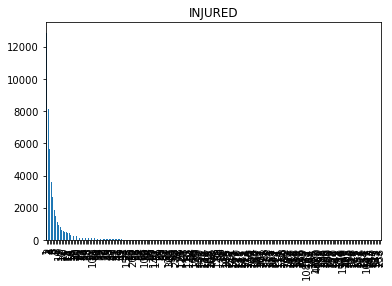

In [174]:
df_check_injured.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

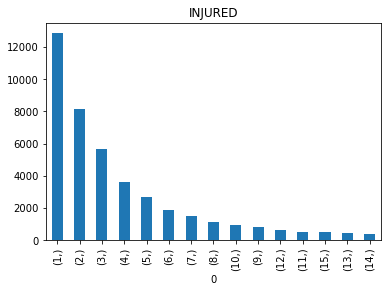

In [208]:
series_a.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

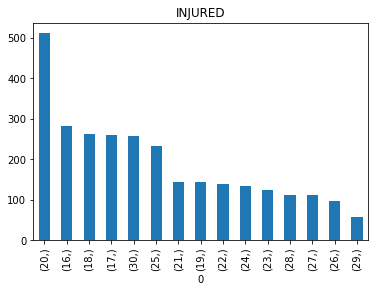

In [209]:
series_b.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

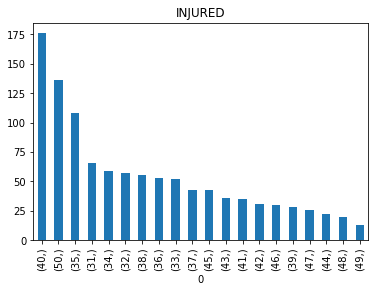

In [210]:
series_c.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

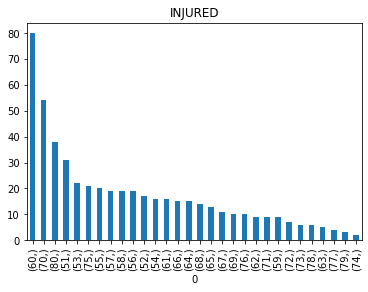

In [211]:
series_d.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

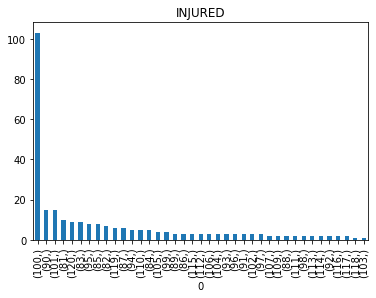

In [212]:
series_e.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

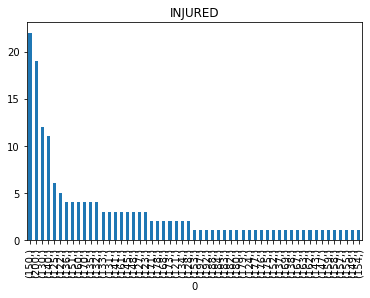

In [213]:
series_f.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

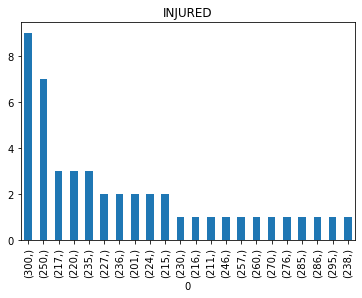

In [214]:
series_g.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

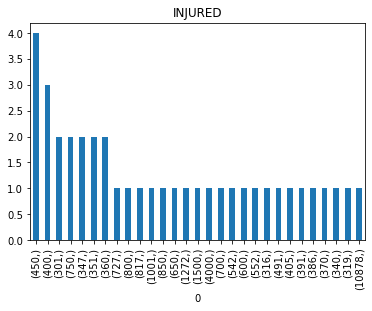

In [215]:
series_h.value_counts().plot(kind='bar')
plt.title('INJURED')

In [217]:
df= load_dataset('df_to_model.csv')
new_injured=pd.cut(df.INJURED,bins=[-1,0,1,2,3,4,5,6,7,15,25,30,40,55,80,120,20000],labels=['0','1','2','3','4','5','6','7','8-15','16-25','26-30','31-40','41-55','56-80','81-120','121-max'])
df["INJURED"]=new_injured

In [235]:
def find_best_k_for_KNN(X_train, y_train):
    clf = KNeighborsClassifier()
    k_parameters = {'n_neighbors':[3,7,9,11]}
    score = make_scorer(metrics.f1_score,needs_threshold=True)
    grid_search_KNN = GridSearchCV(clf,k_parameters,scoring=score)
    grid_search_KNN.fit(X_train, y_train)
    best_K = grid_search_KNN.best_params_['n_neighbors']
    best_f1_val = grid_search_KNN.best_score_
    return best_K, best_f1_val

In [250]:
df= load_dataset('df_to_model.csv')
target_column='INJURED'
df['INJURED'] = df['INJURED'] + df['FATALITIES']
#new_injured=pd.cut(df.INJURED,bins=[-1,0,1,2,3,4,5,6,7,15,25,30,40,55,80,120,20000],labels=['0','1','2','3','4','5','6','7','8-15','16-25','26-30','31-40','41-55','56-80','81-120','121-max'])
new_injured=pd.cut(df.INJURED,bins=[-1,0,20000],labels=['0','1'])
df["INJURED"]=new_injured
X,y = split_df_to_x_y(df,target_column)
random_state=1
test_size=0.2
XTrain, XTest, yTrain, yTest=split_to_train_and_test(X, y, test_size, random_state)
#k,f1=find_best_k_for_KNN(XTrain,yTrain)
k=11

In [251]:
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)
y_pred=clf.predict(XTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

[[ 3588  3999]
 [ 2137 13088]]
Accuracy =  0.7310187620550588
